In [2]:
import os 
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import AdaBoostClassifier
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

import sys
sys.path.append('./src')

import approche_1_2 as modul_1
import segmentation as modul_3
import cnn as modul_cnn

# Vérifier la répartition des classes

In [15]:
import pandas as pd

# fonction pour voir la répartition des classes à l'apprentissage
def repartition(path_file,data_path):
    c={}
    with open(path_file,'r') as fd :
        for line in fd :
            label=line.split('/')[0]
            if not c.get(label):
                c[label]=0
            c[label]+=1

    keys_list = list(c.keys())
    values_list = list(c.values())
    
    c=pd.Series(values_list, index=keys_list)

    return c,len(keys_list),sum(values_list)

In [16]:
repartition,nbr_class,nbr_echantillons=repartition('speech_commands_v0.02/validation_list.txt','speech_commands_v0.02')

### repartition des données par classe

In [17]:
print(repartition)

right       363
eight       346
cat         180
tree        159
backward    153
learn       128
bed         213
happy       219
go          372
dog         197
no          406
wow         193
follow      132
nine        356
left        352
stop        350
three       356
sheila      204
one         351
bird        182
zero        384
seven       387
up          350
visual      139
marvin      195
two         345
house       195
down        377
six         378
yes         397
on          363
five        367
forward     146
off         373
four        373
dtype: int64


### nombre de classe

In [18]:
nbr_class

35

### nombre d'echantillons

In [19]:
nbr_echantillons

9981

# Première approche (remplissage)

    Elle consiste à remplire les signal par des valeur il y'a 2 approches
    
     Dans celle-ci, nous avons opté pour : le remplissage par des 0 les signaux qui ont une longueur plus petite que la taille max
    
    l'autre approche comme les signal sont echantillonés donc dans le systeme temporel il doivent etre non fini et circulere(exemple sinus,cos) pour qu'il peut etre fini dans le systeme frequentiel et admis un frequence max et peut etre echantiloné correctemet d'apres le theoreme de shanone la frequence d'enchentillonage >= 2* f_max ce qui implique a faire du padding circulaire dans le systeme temporale (rajouter le signal en boucle a la fin du signal tant que il est plus petit du signal max)

### BRUTE

In [52]:
modul_1.stock_data('speech_commands_v0.02','dataset','brute')

In [53]:
modul_1.stock_data('speech_commands_v0.02','dataset','brute',apprentissage=False)

In [62]:
x_train,y_train=modul_1.load_data('dataset','brute')
x_test,y_test=modul_1.load_data('dataset','brute',apprentissage=False)

#### Knn

In [63]:
knn_brute=KNeighborsClassifier(n_jobs=-1)
parameters=[
    {'weights':['distance'],
     'n_neighbors': np.arange(5,30,1)
    }
]
#utilisé stratifiedkfold pour avoir une bonne repartition 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid = GridSearchCV(knn_brute, parameters,cv=skf)

modul_1.learning(grid,'resultat','brute',x_train,y_train,x_test,y_test,'knn')

#### Naive Bayes

In [66]:
param_nb = {'var_smoothing': [1e-9,1e-8,1e-7,1e-6]}
_,priors=np.unique(y_train,return_counts=True)
priors=priors/priors.sum()
grid_search = GridSearchCV(GaussianNB(priors=priors), param_nb, cv=skf,scoring='balanced_accuracy')
modul_1.learning(grid_search, 'resultat', 'brute', x_train, y_train, x_test, y_test,'naive_bayes')


### MFCC

In [55]:
modul_1.stock_data('speech_commands_v0.02','dataset','mfcc')

In [56]:
modul_1.stock_data('speech_commands_v0.02','dataset','mfcc',apprentissage=False)

In [67]:
x_train,y_train=modul_1.load_data('dataset','mfcc')
x_test,y_test=modul_1.load_data('dataset','mfcc',apprentissage=False)

#### Knn

In [59]:
knn_mfcc=KNeighborsClassifier(n_jobs=-1)
parameters=[
    {'weights':['distance'],
     'n_neighbors': np.arange(5,30,1)
    }
]
#utilisé stratifiedkfold pour avoir une bonne repartition 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid = GridSearchCV(knn_mfcc, parameters,cv=skf)

modul_1.learning(grid,'resultat','mfcc',x_train,y_train,x_test,y_test,'knn')

#### Naive Bayes

In [68]:
param_nb = {'var_smoothing': [1e-9,1e-8,1e-7,1e-6]}
_,priors=np.unique(y_train,return_counts=True)
priors=priors/priors.sum()
grid_search = GridSearchCV(GaussianNB(priors=priors), param_nb, cv=skf,scoring='balanced_accuracy')
modul_1.learning(grid_search, 'resultat', 'mfcc', x_train, y_train, x_test, y_test,'naive_bayes')


### Melspectrogram

In [69]:
modul_1.stock_data('speech_commands_v0.02','dataset','melspec')

In [70]:
modul_1.stock_data('speech_commands_v0.02','dataset','melspec',apprentissage=False)

In [71]:
x_train,y_train=modul_1.load_data('dataset','melspec')
x_test,y_test=modul_1.load_data('dataset','melspec',apprentissage=False)

#### Knn

In [ ]:
knn_melspec=KNeighborsClassifier(n_jobs=-1)
parameters=[
    {'weights':['distance'],
     'n_neighbors': np.arange(5,30,1)
    }
]
#utilisé stratifiedkfold pour avoir une bonne repartition 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid = GridSearchCV(knn_melspec, parameters,cv=skf)

modul_1.learning(grid,'resultat','melspec',x_train,y_train,x_test,y_test,'knn')

#### Naive Bayes

In [72]:
param_nb = {'var_smoothing': [1e-9,1e-8,1e-7,1e-6]}
_,priors=np.unique(y_train,return_counts=True)
priors=priors/priors.sum()
grid_search = GridSearchCV(GaussianNB(priors=priors), param_nb, cv=skf,scoring='balanced_accuracy')
modul_1.learning(grid_search, 'resultat', 'melspec', x_train, y_train, x_test, y_test,'naive_bayes')

### Harmonique

In [73]:
modul_1.stock_data('speech_commands_v0.02','dataset','harm')

In [74]:
modul_1.stock_data('speech_commands_v0.02','dataset','harm',apprentissage=False)

In [75]:
x_train,y_train=modul_1.load_data('dataset','harm')
x_test,y_test=modul_1.load_data('dataset','harm',apprentissage=False)

#### Knn

In [4]:
knn_harm=KNeighborsClassifier(n_jobs=-1)
parameters=[
    {'weights':['distance'],
     'n_neighbors': np.arange(5,30,1)
    }
]
#utilisé stratifiedkfold pour avoir une bonne repartition 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid = GridSearchCV(knn_harm, parameters,cv=skf)

modul_1.learning(grid,'resultat','harm',x_train,y_train,x_test,y_test,'knn')

#### Naive Bayes

In [76]:
param_nb = {'var_smoothing': [1e-9,1e-8,1e-7,1e-6]}
_,priors=np.unique(y_train,return_counts=True)
priors=priors/priors.sum()
grid_search = GridSearchCV(GaussianNB(priors=priors), param_nb, cv=skf,scoring='balanced_accuracy')
modul_1.learning(grid_search, 'resultat', 'harm', x_train, y_train, x_test, y_test,'naive_bayes')

### Percussive

In [77]:
modul_1.stock_data('speech_commands_v0.02','dataset','perc')

In [78]:
modul_1.stock_data('speech_commands_v0.02','dataset','perc',apprentissage=False)

In [79]:
x_train,y_train=modul_1.load_data('dataset','perc')
x_test,y_test=modul_1.load_data('dataset','perc',apprentissage=False)

#### Knn

In [4]:
knn_perc=KNeighborsClassifier(n_jobs=-1)
parameters=[
    {'weights':['distance'],
     'n_neighbors': np.arange(5,30,1)
    }
]
#utilisé stratifiedkfold pour avoir une bonne repartition 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid = GridSearchCV(knn_perc, parameters,cv=skf)

modul_1.learning(grid,'resultat','perc',x_train,y_train,x_test,y_test,'knn')

#### Naives Bayes

In [80]:
param_nb = {'var_smoothing': [1e-9,1e-8,1e-7,1e-6]}

_,priors=np.unique(y_train,return_counts=True)
priors=priors/priors.sum()

grid_search = GridSearchCV(GaussianNB(priors=priors), param_nb, cv=skf,scoring='balanced_accuracy')
modul_1.learning(grid_search, 'resultat', 'perc', x_train, y_train, x_test, y_test,'naive_bayes')

## Affichage des résultats 

In [135]:
modul_1.affichage("max")

  representation       modele  score_app  score_test
0           mfcc          knn   0.432621    0.385396
1           mfcc  naive_bayes   0.306813    0.281878
2          brute          knn   0.054904    0.047610
3          brute  naive_bayes   0.043856    0.043919
4        melspec          knn   0.131350    0.094926
5        melspec  naive_bayes   0.142161    0.119081
6           harm          knn   0.056808    0.044282
7           harm  naive_bayes   0.047774    0.051783
8           perc          knn   0.058310    0.052324
9           perc  naive_bayes   0.043661    0.043286


### matrice de confusion

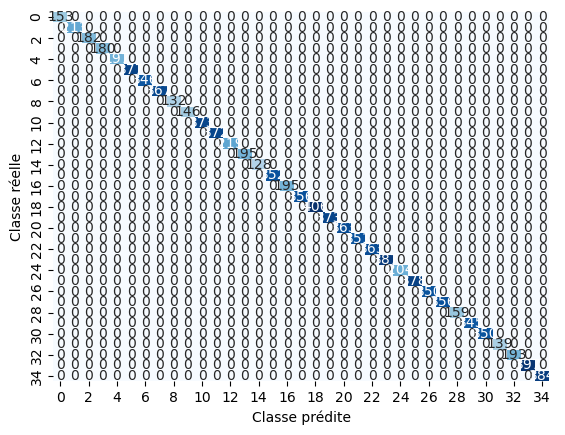

In [3]:
modul_1.show_matrix('knn','mfcc','max')

# 2ème approche (remise à l'echelle par suppression)

    elle consiste à mettre les signal à la taille du plus petit signal 

### BRUTE

In [81]:
modul_1.stock_data('speech_commands_v0.02','dataset','brute',approche=False)

In [82]:
modul_1.stock_data('speech_commands_v0.02','dataset','brute',apprentissage=False,approche=False)

In [83]:
x_train,y_train=modul_1.load_data('dataset','brute',approche=False)
x_test,y_test=modul_1.load_data('dataset','brute',apprentissage=False,approche=False)

#### knn

In [5]:
knn_brute=KNeighborsClassifier(n_jobs=-1)
parameters=[
    {'weights':['distance'],
     'n_neighbors': np.arange(5,30,1)
    }
]
#utilisé stratifiedkfold pour avoir une bonne repartition 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid = GridSearchCV(knn_brute, parameters,cv=skf)

modul_1.learning(grid,'resultat','brute',x_train,y_train,x_test,y_test,'knn',approche='min')

#### Naive Bayes

In [84]:
param_nb = {'var_smoothing': [1e-9,1e-8,1e-7,1e-6]}

_,priors=np.unique(y_train,return_counts=True)
priors=priors/priors.sum()

grid_search = GridSearchCV(GaussianNB(priors=priors), param_nb, cv=skf,scoring='balanced_accuracy')
modul_1.learning(grid_search, 'resultat', 'brute', x_train, y_train, x_test, y_test,'naive_bayes',approche='min')

### MFCC

In [85]:
modul_1.stock_data('speech_commands_v0.02','dataset','mfcc',approche=False)

In [86]:
modul_1.stock_data('speech_commands_v0.02','dataset','mfcc',apprentissage=False,approche=False)

In [87]:
x_train,y_train=modul_1.load_data('dataset','mfcc',approche=False)
x_test,y_test=modul_1.load_data('dataset','mfcc',apprentissage=False,approche=False)

#### Knn

In [11]:
knn_mfcc=KNeighborsClassifier(n_jobs=-1)
parameters=[
    {'weights':['distance'],
     'n_neighbors': np.arange(5,30,1)
    }
]
#utilisé stratifiedkfold pour avoir une bonne repartition 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid = GridSearchCV(knn_mfcc, parameters,cv=skf)

modul_1.learning(grid,'resultat','mfcc',x_train,y_train,x_test,y_test,'knn',approche='min')

#### Naives Bayes

In [88]:
param_nb = {'var_smoothing': [1e-9,1e-8,1e-7,1e-6]}

_,priors=np.unique(y_train,return_counts=True)
priors=priors/priors.sum()

grid_search = GridSearchCV(GaussianNB(priors=priors), param_nb, cv=skf,scoring='balanced_accuracy')
modul_1.learning(grid_search, 'resultat', 'mfcc', x_train, y_train, x_test, y_test,'naive_bayes',approche='min')

### Melspec

In [89]:
modul_1.stock_data('speech_commands_v0.02','dataset','melspec',approche=False)

In [90]:
modul_1.stock_data('speech_commands_v0.02','dataset','melspec',apprentissage=False,approche=False)

In [91]:
x_train,y_train=modul_1.load_data('dataset','melspec',approche=False)
x_test,y_test=modul_1.load_data('dataset','melspec',apprentissage=False,approche=False)

#### Knn

In [15]:
knn_melspec=KNeighborsClassifier(n_jobs=-1)
parameters=[
    {'weights':['distance'],
     'n_neighbors': np.arange(5,30,1)
    }
]
#utilisé stratifiedkfold pour avoir une bonne repartition 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid = GridSearchCV(knn_melspec, parameters,cv=skf)

modul_1.learning(grid,'resultat','melspec',x_train,y_train,x_test,y_test,'knn',approche='min')

#### Naives Bayes

In [92]:
param_nb = {'var_smoothing': [1e-9,1e-8,1e-7,1e-6]}

_,priors=np.unique(y_train,return_counts=True)
priors=priors/priors.sum()

grid_search = GridSearchCV(GaussianNB(priors=priors), param_nb, cv=skf,scoring='balanced_accuracy')
modul_1.learning(grid_search, 'resultat', 'melspec', x_train, y_train, x_test, y_test,'naive_bayes', approche='min')

### Harmonique

In [93]:
modul_1.stock_data('speech_commands_v0.02','dataset','harm',approche=False)

In [94]:
modul_1.stock_data('speech_commands_v0.02','dataset','harm',apprentissage=False,approche=False)

In [95]:
x_train,y_train=modul_1.load_data('dataset','harm',approche=False)
x_test,y_test=modul_1.load_data('dataset','harm',apprentissage=False,approche=False)

#### Knn

In [21]:
knn_harm=KNeighborsClassifier(n_jobs=-1)
parameters=[
    {'weights':['distance'],
     'n_neighbors': np.arange(5,30,1)
    }
]
#utilisé stratifiedkfold pour avoir une bonne repartition 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid = GridSearchCV(knn_harm, parameters,cv=skf)

modul_1.learning(grid,'resultat','harm',x_train,y_train,x_test,y_test,'knn',approche='min')

#### Naives Bayes

In [96]:
param_nb = {'var_smoothing': [1e-9,1e-8,1e-7,1e-6]}

_,priors=np.unique(y_train,return_counts=True)
priors=priors/priors.sum()

grid_search = GridSearchCV(GaussianNB(priors=priors), param_nb, cv=skf,scoring='balanced_accuracy')
modul_1.learning(grid_search, 'resultat', 'harm', x_train, y_train, x_test, y_test,'naive_bayes',approche='min')

### Percussive

In [97]:
modul_1.stock_data('speech_commands_v0.02','dataset','perc',approche=False)

In [98]:
modul_1.stock_data('speech_commands_v0.02','dataset','perc',apprentissage=False,approche=False)

In [99]:
x_train,y_train=modul_1.load_data('dataset','perc',approche=False)
x_test,y_test=modul_1.load_data('dataset','perc',apprentissage=False,approche=False)

#### Knn

In [26]:
knn_perc=KNeighborsClassifier(n_jobs=-1)
parameters=[
    {'weights':['distance'],
     'n_neighbors': np.arange(5,30,1)
    }
]
#utilisé stratifiedkfold pour avoir une bonne repartition 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid = GridSearchCV(knn_perc, parameters,cv=skf)

modul_1.learning(grid,'resultat','perc',x_train,y_train,x_test,y_test,'knn',approche='min')

#### Naives Bayes

In [100]:
param_nb = {'var_smoothing': [1e-9,1e-8,1e-7,1e-6]}

_,priors=np.unique(y_train,return_counts=True)
priors=priors/priors.sum()

grid_search = GridSearchCV(GaussianNB(priors=priors), param_nb, cv=skf,scoring='balanced_accuracy')
modul_1.learning(grid_search, 'resultat', 'perc', x_train, y_train, x_test, y_test,'naive_bayes',approche='min')

## Affichage des résultats 

In [133]:
modul_1.affichage("min")

  representation       modele  score_app  score_test
0           mfcc          knn   0.178138    0.156750
1           mfcc  naive_bayes   0.113426    0.114172
2          brute          knn   0.058210    0.043054
3          brute  naive_bayes   0.034158    0.038125
4        melspec          knn   0.089269    0.070060
5        melspec  naive_bayes   0.074049    0.069694
6           harm          knn   0.039976    0.034930
7           harm  naive_bayes   0.035363    0.037496
8           perc          knn   0.054002    0.046550
9           perc  naive_bayes   0.033864    0.035845


### matrice de confusion

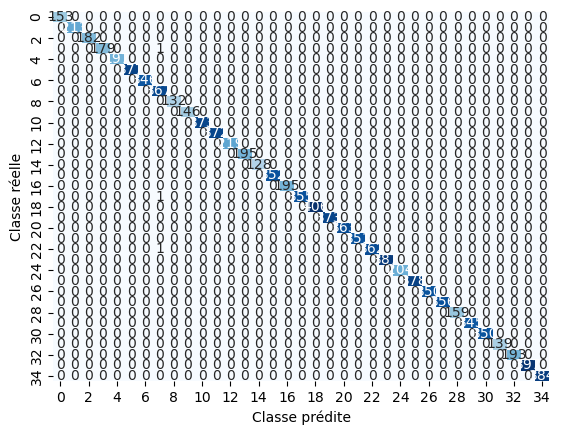

In [4]:
modul_1.show_matrix('knn','mfcc','min')

    pour ces matrice de confusion je me suis planter quelque part 

### carachteristique de nos données

#### train

In [4]:
max,min,avg=modul_1.show_min_max_avg('speech_commands_v0.02',app=True)
print('max ',max,'min ',min,'moyenne ',avg)

max  22050 min  7526 moyenne  21621.997395050596


#### test

In [5]:
max,min,avg=modul_1.show_min_max_avg('speech_commands_v0.02',app=False)
print('max ',max,'min ',min,'moyenne ',avg)

max  22050 min  4704 moyenne  21672.936846887776


# 3eme aproche (segmentation)

     Elle consiste à découper nos signaux en plusieurs fragments avec une fenêtre et faire un système de vote

#### segmentation (fenetre 500 , taille chavechement 200)

In [ ]:
size_w,chauvechement=500,200

#### BRUTE

In [ ]:
#sans chauvechement
modul_3.stock_data('speech_commands_v0.02','dataset','brute',size_w=size_w)
modul_3.stock_data('speech_commands_v0.02','dataset','brute',size_w=size_w,apprentissage=False)

#avec chauvechement
modul_3.stock_data('speech_commands_v0.02','dataset','brute',size_w=size_w,chauvechement=chauvechement)
modul_3.stock_data('speech_commands_v0.02','dataset','brute',size_w=size_w,apprentissage=False,chauvechement=chauvechement)

In [ ]:
modul_3.lanch('dataset/segmentation/500','resultat/segmentation/500','brute')

### HARM

In [ ]:
#sans chauvechement
modul_3.stock_data('speech_commands_v0.02','dataset','harm',size_w=size_w)
modul_3.stock_data('speech_commands_v0.02','dataset','harm',size_w=size_w,apprentissage=False)

#avec chauvechement
modul_3.stock_data('speech_commands_v0.02','dataset','harm',size_w=size_w,chauvechement=chauvechement)
modul_3.stock_data('speech_commands_v0.02','dataset','harm',size_w=size_w,apprentissage=False,chauvechement=chauvechement)

In [ ]:
modul_3.lanch('dataset/segmentation/500','resultat/segmentation/500','harm')

### PERC

In [ ]:
#sans chauvechement
modul_3.stock_data('speech_commands_v0.02','dataset','perc',size_w=size_w)
modul_3.stock_data('speech_commands_v0.02','dataset','perc',size_w=size_w,apprentissage=False)

#avec chauvechement
modul_3.stock_data('speech_commands_v0.02','dataset','perc',size_w=size_w,chauvechement=chauvechement)
modul_3.stock_data('speech_commands_v0.02','dataset','perc',size_w=size_w,apprentissage=False,chauvechement=chauvechement)

In [ ]:
modul_3.lanch('dataset/segmentation/500','resultat/segmentation/500','perc')

### MFCC

In [ ]:
#sans chauvechement
modul_3.stock_data('speech_commands_v0.02','dataset','mfcc',size_w=size_w)
modul_3.stock_data('speech_commands_v0.02','dataset','mfcc',size_w=size_w,apprentissage=False)

#avec chauvechement
modul_3.stock_data('speech_commands_v0.02','dataset','mfcc',size_w=size_w,chauvechement=chauvechement)
modul_3.stock_data('speech_commands_v0.02','dataset','mfcc',size_w=size_w,apprentissage=False,chauvechement=chauvechement)

In [ ]:
modul_3.lanch('dataset/segmentation/500','resultat/segmentation/500','mfcc')

### MELSPEC

In [ ]:
#sans chauvechement
modul_3.stock_data('speech_commands_v0.02','dataset','melspec',size_w=size_w)
modul_3.stock_data('speech_commands_v0.02','dataset','melspec',size_w=size_w,apprentissage=False)

#avec chauvechement
modul_3.stock_data('speech_commands_v0.02','dataset','melspec',size_w=size_w,chauvechement=chauvechement)
modul_3.stock_data('speech_commands_v0.02','dataset','melspec',size_w=size_w,apprentissage=False,chauvechement=chauvechement)

In [ ]:
modul_3.lanch('dataset/segmentation/500','resultat/segmentation/500','melspec')

### SPEC

    Infaisable, temps d'exécution beaucoup trop long 

### Resultat

In [2]:
modul_3.affichage('500')

,representation,modele,chauvechement,score_app,score_test
0,mfcc,knn,non,0.431872,0.202107
1,mfcc,knn,oui,0.476216,0.259825
2,mfcc,nb,non,0.230539,0.195352
3,mfcc,nb,oui,0.298305,0.257068
4,brute,knn,non,0.166586,0.039221
5,brute,knn,oui,0.174094,0.040559
6,brute,nb,non,0.061799,0.043940
7,brute,nb,oui,0.056066,0.037342
8,melspec,knn,non,0.284882,0.069738
9,melspec,knn,oui,0.314507,0.076545


### matrice de confusion

### chauvechement

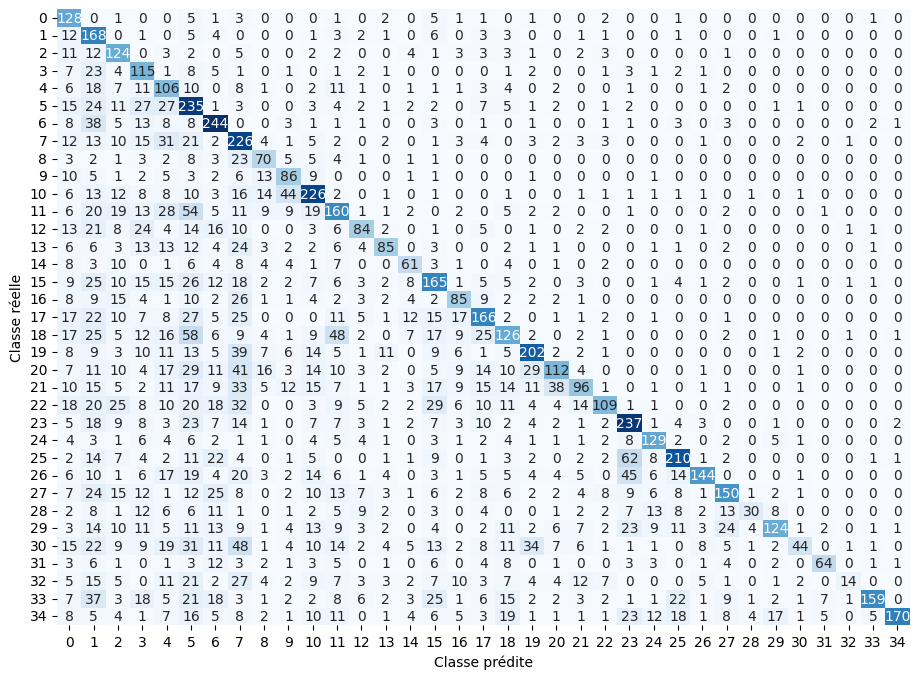

In [3]:
modul_3.show_matrix('knn','ac','mfcc',500)

### sans chauvechement

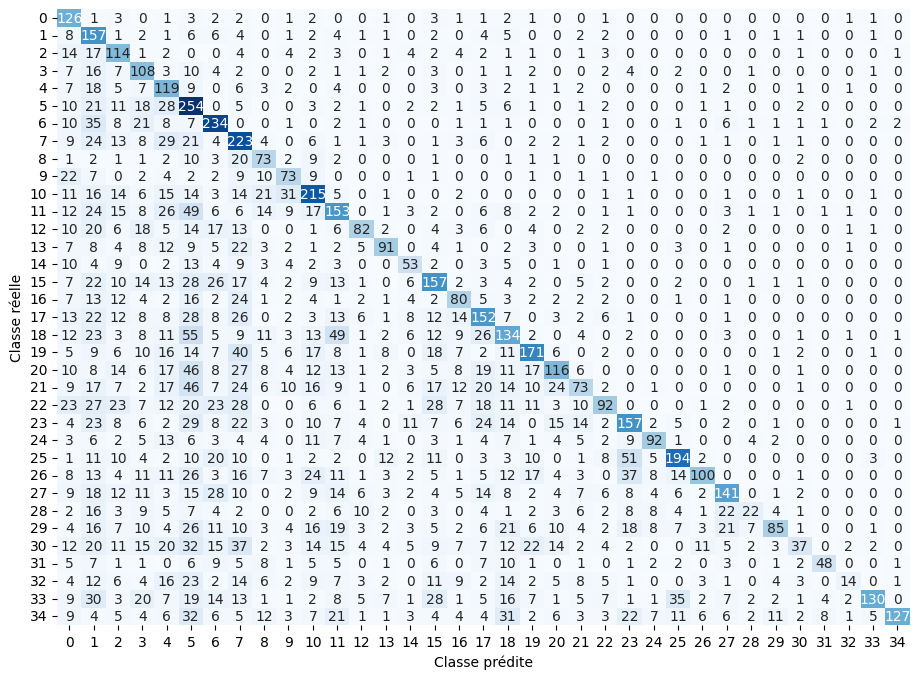

In [4]:
modul_3.show_matrix('knn','sc','mfcc',500)

#### segmentation (fenetre 200 , taille chavechement 100)

In [12]:
size_w,chauvechement=200,100

#### BRUTE

In [13]:
#sans chauvechement
modul_3.stock_data('speech_commands_v0.02','dataset','brute',size_w=size_w)
modul_3.stock_data('speech_commands_v0.02','dataset','brute',size_w=size_w,apprentissage=False)

#avec chauvechement
#modul_3.stock_data('speech_commands_v0.02','dataset','brute',size_w=size_w,chauvechement=chauvechement)
#modul_3.stock_data('speech_commands_v0.02','dataset','brute',size_w=size_w,apprentissage=False,chauvechement=chauvechement)

In [ ]:
modul_3.lanch('dataset/segmentation/200','resultat/segmentation/200','brute')

### HARM

In [ ]:
#sans chauvechement
modul_3.stock_data('speech_commands_v0.02','dataset','harm',size_w=size_w)
modul_3.stock_data('speech_commands_v0.02','dataset','harm',size_w=size_w,apprentissage=False)

#avec chauvechement
modul_3.stock_data('speech_commands_v0.02','dataset','harm',size_w=size_w,chauvechement=chauvechement)
modul_3.stock_data('speech_commands_v0.02','dataset','harm',size_w=size_w,apprentissage=False,chauvechement=chauvechement)

In [ ]:
modul_3.lanch('dataset/segmentation/200','resultat/segmentation/200','harm')

### PERC

In [ ]:
#sans chauvechement
modul_3.stock_data('speech_commands_v0.02','dataset','perc',size_w=size_w)
modul_3.stock_data('speech_commands_v0.02','dataset','perc',size_w=size_w,apprentissage=False)

#avec chauvechement
modul_3.stock_data('speech_commands_v0.02','dataset','perc',size_w=size_w,chauvechement=chauvechement)
modul_3.stock_data('speech_commands_v0.02','dataset','perc',size_w=size_w,apprentissage=False,chauvechement=chauvechement)

In [ ]:
modul_3.lanch('dataset/segmentation/200','resultat/segmentation/200','harm')

### MFCC

In [ ]:
#sans chauvechement
modul_3.stock_data('speech_commands_v0.02','dataset','mfcc',size_w=size_w)
modul_3.stock_data('speech_commands_v0.02','dataset','mfcc',size_w=size_w,apprentissage=False)

#avec chauvechement
modul_3.stock_data('speech_commands_v0.02','dataset','mfcc',size_w=size_w,chauvechement=chauvechement)
modul_3.stock_data('speech_commands_v0.02','dataset','mfcc',size_w=size_w,apprentissage=False,chauvechement=chauvechement)

In [ ]:
modul_3.lanch('dataset/segmentation/200','resultat/segmentation/200','mfcc')

### MELSPEC

In [ ]:
#sans chauvechement
modul_3.stock_data('speech_commands_v0.02','dataset','melspec',size_w=size_w)
modul_3.stock_data('speech_commands_v0.02','dataset','melspec',size_w=size_w,apprentissage=False)

#avec chauvechement
modul_3.stock_data('speech_commands_v0.02','dataset','melspec',size_w=size_w,chauvechement=chauvechement)
modul_3.stock_data('speech_commands_v0.02','dataset','melspec',size_w=size_w,apprentissage=False,chauvechement=chauvechement)

In [ ]:
modul_3.lanch('dataset/segmentation/200','resultat/segmentation/200','melspec')

### Resultat

In [3]:
modul_3.affichage('200')

,representation,modele,chauvechement,score_app,score_test
0,mfcc,knn,non,0.503890,0.223162
1,mfcc,knn,oui,0.777821,0.317304
2,mfcc,nb,non,0.177173,0.161876
3,mfcc,nb,oui,0.204722,0.181879
4,brute,knn,non,0.270674,0.047579
5,brute,knn,oui,0.303573,0.054204
6,brute,nb,non,0.031288,0.030548
7,brute,nb,oui,0.034117,0.032920
8,melspec,knn,non,0.339596,0.067571
9,melspec,knn,oui,0.580466,0.092515


## matrice de confusion

### chauvechement

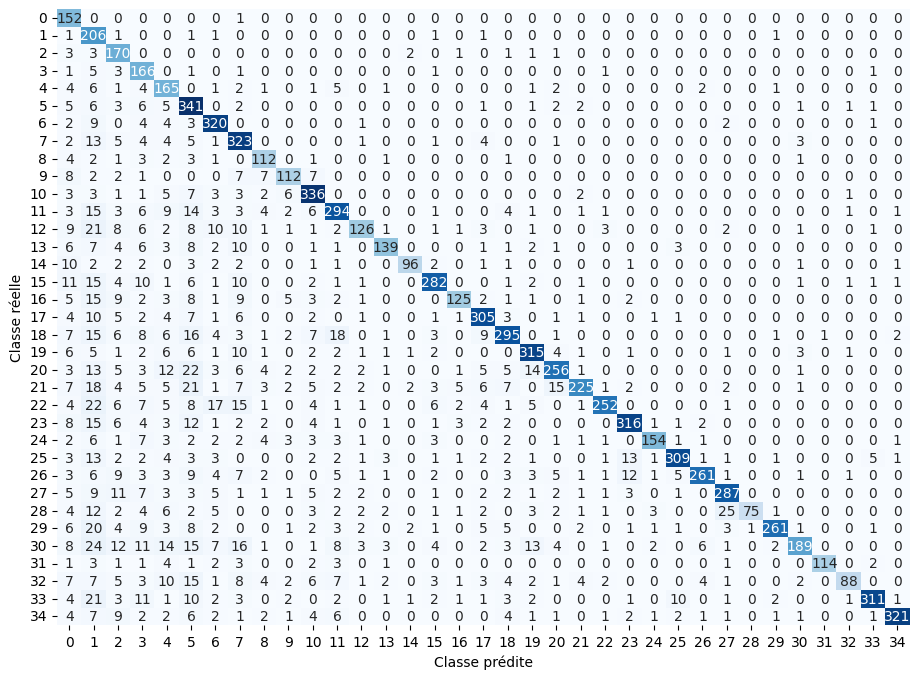

In [5]:
modul_3.show_matrix('knn','ac','mfcc',200)

### sans chauvechement

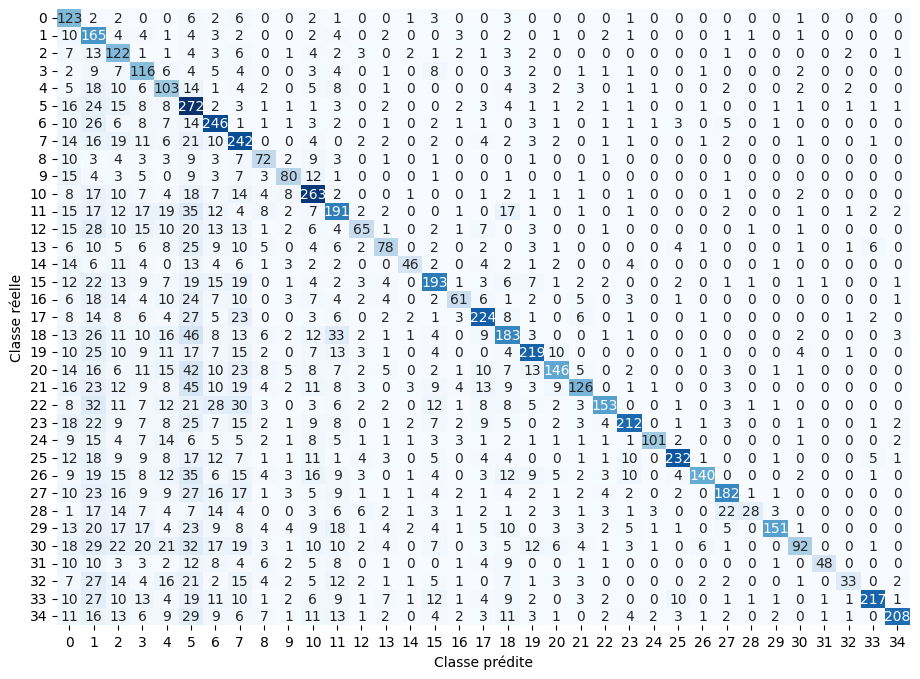

In [6]:
modul_3.show_matrix('knn','sc','mfcc',200)

    on remarque que nos representation c'est le mfcc qui permet des stocker info pertinante a nos signales car c'est lui qui le meilleur resultat dans tout les approche et lorsque on applique un chauvechement (lissage) on des meilleur resultat ce qui est tout a fait logique car on permet de faire une liason entre les segment (partage de donée en comun)

    pour ces 3 premiere approche je voulais faire du bosting mais avec une grid de 3 modele ca prenais plus 10h d'execution donc j'ai arreter l'execution

    aussi on a essayer de tester un svm multiclass mais comme on a trop de dimension le probleme etait trop complexe donc j'ai fait une pca avec une expressiviter de 95% des espace l'attente des nouvelles feature par rapport les ancien mais elle n'a pas etait retenu mais le svm il pouvais s'executer

# Partie neuronalle

In [ ]:
import torch

    pour executer ce code il n'est vraiment tres propre on doit modifie le module cnn pour chaque representation

In [84]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if device == "cuda":
    num_workers = 1
    pin_memory = True
else:
    num_workers = 0
    pin_memory = False

batch_size=5000

# CNN

In [87]:
modul_cnn.lanch(batch_size,780,1000,num_workers,pin_memory,'mfcc',device,'500',chauvechement=True)

get_data_loader  ac
True


  0%|          | 0/1000 [00:00<?, ?it/s]/tmp/ipykernel_27780/1386123124.py:101: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data, device=device, dtype=torch.float32)
100%|██████████| 1000/1000 [1:21:56<00:00,  4.92s/it]
/tmp/ipykernel_27780/1386123124.py:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, device=device, dtype=torch.float32)


stock_result  ac
predict ac
predict ac


/tmp/ipykernel_27780/1386123124.py:72: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, device=device, dtype=torch.float32)


0.3683362711035052 0.8039961388460536


### resultat 200

In [11]:
modul_cnn.affichage('200')

,representation,modele,chauvechement,score_app,score_test
0,mfcc,2_conv 1_lineare,non,0.371782,0.243455
1,mfcc,2_conv 1_lineare,oui,0.472872,0.344865
2,mfcc,2_conv 2_lineare,non,0.541066,0.266756
3,mfcc,2_conv 2_lineare,oui,0.672951,0.393988
4,mfcc,2_conv 3_lineare,non,0.585592,0.292571
5,mfcc,2_conv 3_lineare,oui,0.713457,0.405898
6,mfcc,2_conv 5_lineare,non,0.600133,0.300247
7,mfcc,2_conv 5_lineare,oui,0.737621,0.433494


### matrice de confusion

#### chauvechement

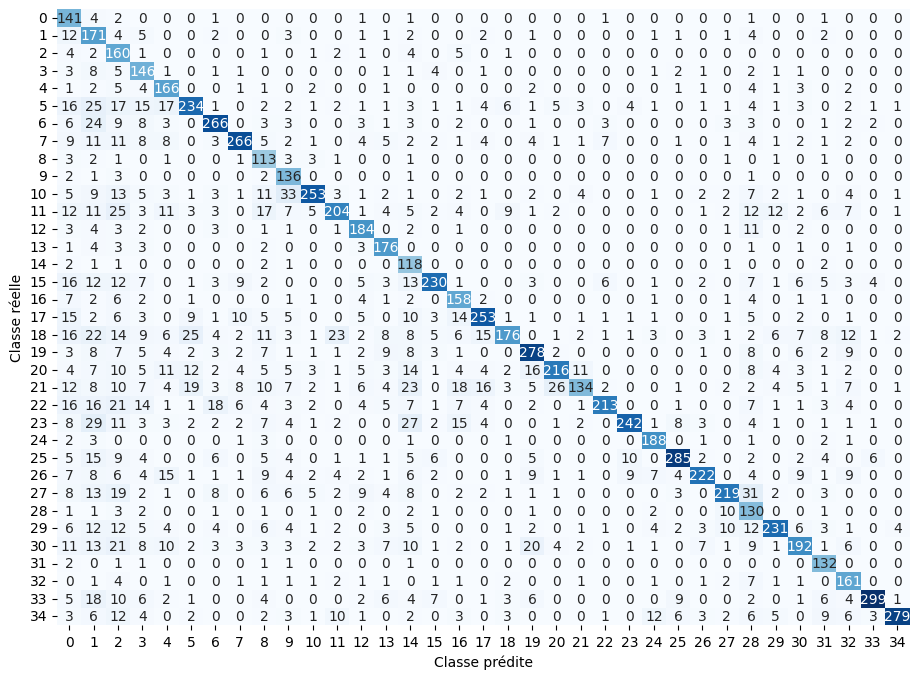

In [2]:
modul_cnn.show_matrix('5_lineare','ac','mfcc',200,'2_conv')

#### sans chauvechement

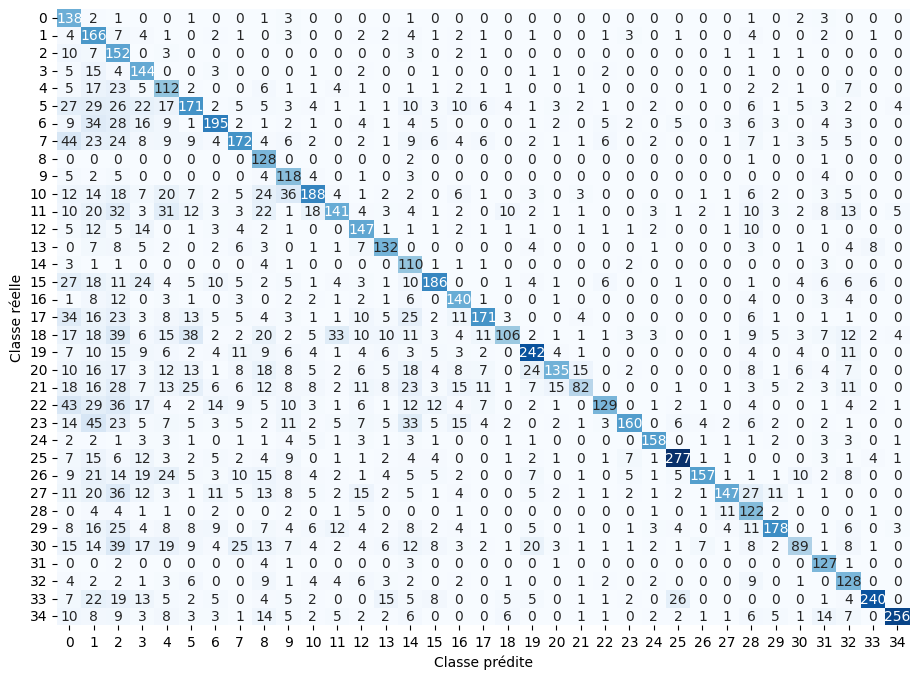

In [3]:
modul_cnn.show_matrix('5_lineare','sc','mfcc',200,'2_conv')

### resultat 500

In [13]:
modul_cnn.affichage('500')

,representation,modele,chauvechement,score_app,score_test
0,mfcc,2_conv 1_lineare,non,0.530659,0.317937
1,mfcc,2_conv 1_lineare,oui,0.625339,0.394916
2,mfcc,2_conv 2_lineare,non,0.740564,0.336691
3,mfcc,2_conv 2_lineare,oui,0.807833,0.414018
4,mfcc,2_conv 3_lineare,non,0.775394,0.326159
5,mfcc,2_conv 3_lineare,oui,0.836548,0.401369
6,mfcc,2_conv 5_lineare,non,0.709547,0.287047
7,mfcc,2_conv 5_lineare,oui,0.803996,0.368336


### matrice de confusion

#### chauvechement

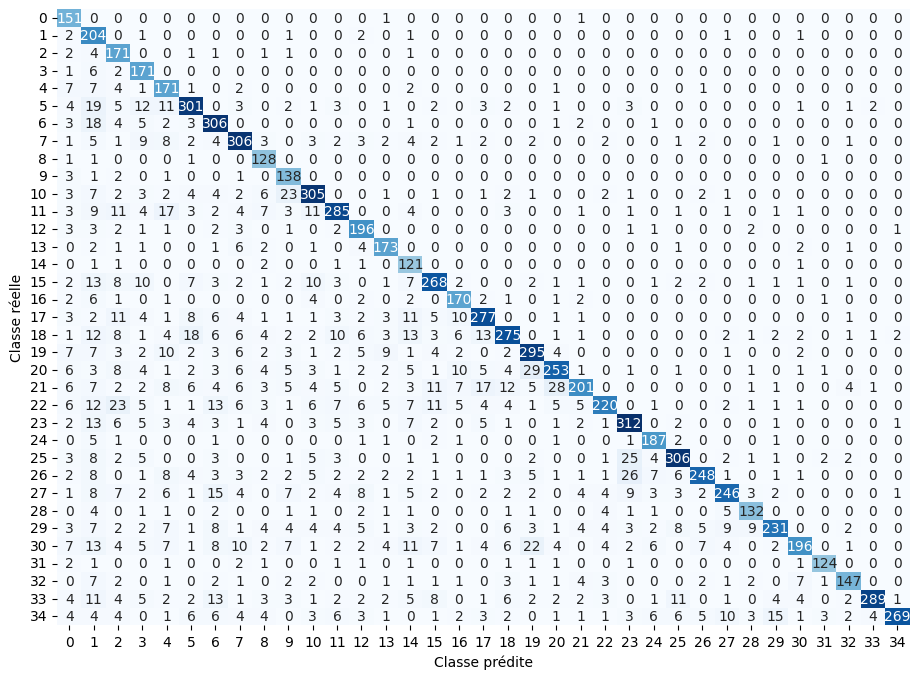

In [4]:
modul_cnn.show_matrix('2_lineare','ac','mfcc',500,'2_conv')

#### sans chauvechement

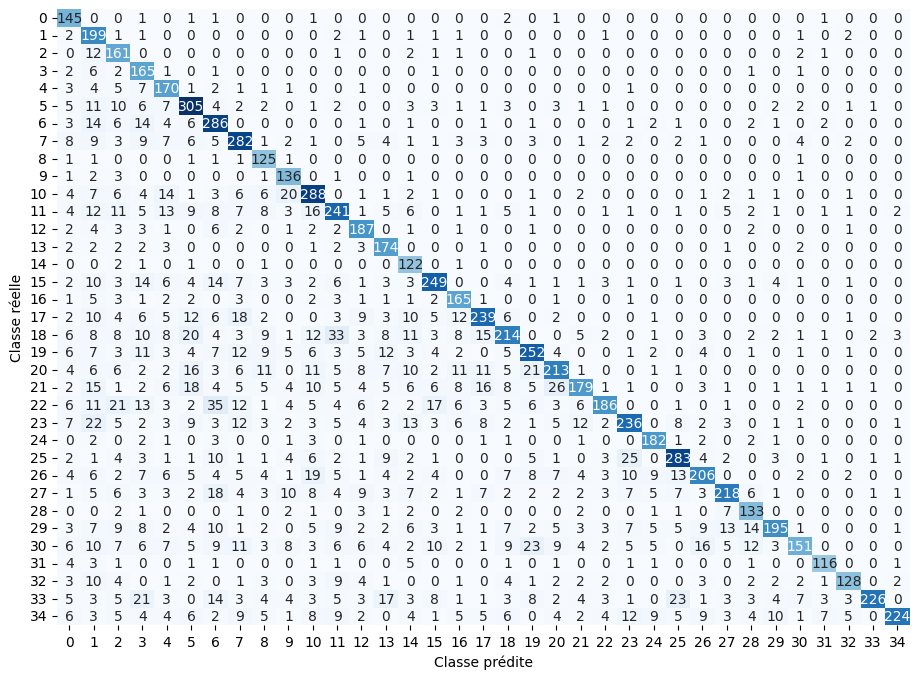

In [5]:
modul_cnn.show_matrix('2_lineare','sc','mfcc',500,'2_conv')

    on remarque qu'on est en sous apprentissage dans certain modele, on a un score en test meilleur avec des cnn que des approche ML pour les meme score de apprentissage

    on a pas eu le temp pour tester des modele plus complexe pour enlever le sur apprentissage

    les autre representation non pas etait faite car mon pc se crash avec un mini batch a cause de l'explostion de memoire j'ai tester une descente scotashtique mais en minimume elle prendra 20h pour un seul modele qui n'est pas vraiment complexe donc je n'ai les ai pas executer

# RNN / LSTM

    j'ai a pas eu le temps d'executer des rnn ou lstm mais ils sont parmi les plus adapté pour ce type probleme car il traitent des sequence est un signal est une sequence, et ils peuvent traiter le probleme de taille variable des features de nos signal

    et comme dans les rnn les sortie d'un module c'est les entrer d'un entre ca permet de relie les features entre eu donc d'impliquer la dependance, ce qui nous donnera automatiquement un ordre des 
    de pronociation des lettre si on suppose que chaque feature c'est lettre mais en pratique non mais la combinaison des feautre est une lettre mais la combinaison des feauture en theroie ca permet de deuire un lettre et vise faire ca jusqu'a deduire un mot

    et dans les lstm c'est un rnn++ on a une memoire courte qui permet de conserver les info a courte terme et de decider c'est elle entrera dans les prochain module donc si on avait du bruit on l'eliminé et une memoire longue qui d'apres ce nom elle permet de stocker les information les pertinante qui servent a la classification donc elle conserve les info les plus pertinante de la sequence a longue terme qui permet de diffirencie les sequence

    je n'ai pas eu le temps de les faire mais je pense avec un lstm je pouvais avoir un score de 80% en test 